# Loan Approval Prediction

## Table of Contents

1. Importing Data

2. Data Cleaning

3. Exploratory Data Analysis

4. Converting Categorical Data To Numerical Data

5. Train Test Split

6. Machine Learning Model

Conclusion

## 1. Importing Data

In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("D:\Data Science\PROJECT\LOAN APPROVAL\loan_approval_dataset.csv")

### Displaying Data In Small Sample

In [3]:
df.head() # Displays first five rows

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.tail() #Displays last five rows

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [5]:
df.sample(5) # Displaying random five rows

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
838,839,2,Not Graduate,Yes,5400000,11500000,6,841,6800000,100000,11100000,6600000,Approved
3812,3813,1,Not Graduate,Yes,3700000,10900000,14,748,3700000,2800000,13200000,4100000,Approved
2193,2194,0,Graduate,Yes,7800000,23300000,10,587,12500000,9300000,27500000,9700000,Approved
1270,1271,1,Not Graduate,Yes,3500000,11600000,10,898,3100000,2700000,9000000,4500000,Approved
1268,1269,3,Graduate,Yes,2200000,5300000,2,506,1600000,1700000,5800000,2800000,Rejected


## 2. Data Cleaning

-  After collecting the data, Next step we need to understand what kind of data we have and drop columns which is irrelevent for this project.

In [6]:
df.info() # Shows information of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


#### As we can see in the output.

-  There are 4269 entries

-  There are total 12 features (0 to 11)

-  There are three types of datatype dtypes:  int64(9), object(3)

-  It's Memory usage that is, memory usage: 433.7+ KB

-  We can check how many missing values available in the Non-Null Count column

In [7]:
df.isnull().sum() # Total Number of Null values

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

-  Just as we checked in info() there is no null values present in this Data set

In [8]:
df.describe() # Finding Mean, Standard Deviation and Inter Quartile Range

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [9]:
columns_to_remove = ['loan_id'] #Removing loan_id because it is irrelevent for our algorithm

# Remove the specified columns
df.drop(columns=columns_to_remove, inplace=True)

In [10]:
df.columns # To check if loan_id is dropped

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [11]:
df.columns = df.columns.str.lstrip() #Clean leading space in columns

In [12]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

## 3. Exploratory Data Analysis

### Plotting Graphs

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Necessary library for plotting graphs

Text(0.5, 1.0, 'To Check Outliers')

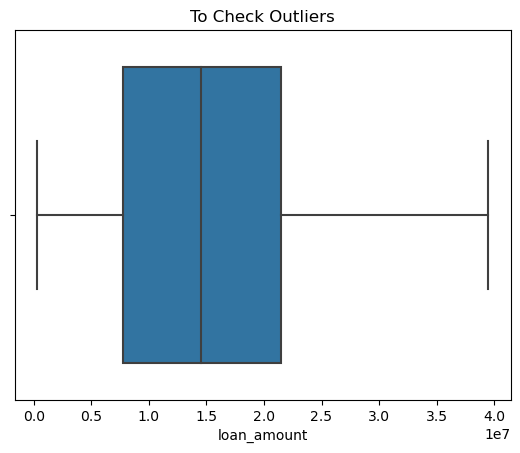

In [14]:
sns.boxplot(df['loan_amount']).set_title('To Check Outliers')

-  There isn't any outliers present in this Data Set

Text(0.5, 1.0, 'Self Employed')

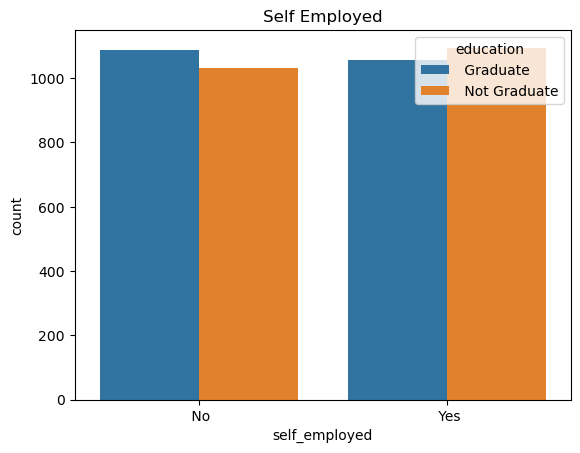

In [15]:
sns.countplot(x='self_employed', data = df, hue = 'education').set_title('Self Employed')

-  This graph depicts the relationship between the employment status of applicants and their education levels which highlights important trends for loan approval considerations.

-  It reveals that a majority of non-graduate applicants are self-employed, while most graduate applicants are not self-employed which this indicates that graduates are more likely to be employed in salaried positions, whereas non-graduates tend to be self-employed.
-  This distinction has implications for loan approval decisions. Graduates' propensity for stable salaried employment suggests a more predictable income source, potentially enhancing their ability to repay loans.
-  Conversely, self-employed non-graduates might have more fluctuating incomes, posing challenges for consistent loan repayment.
-  However, it's important to note that self-employed individuals among non-graduates might also have the potential to earn higher incomes, potentially counteracting income volatility concerns.

Text(0.5, 1.0, 'Number of Dependants Vs Loan Status')

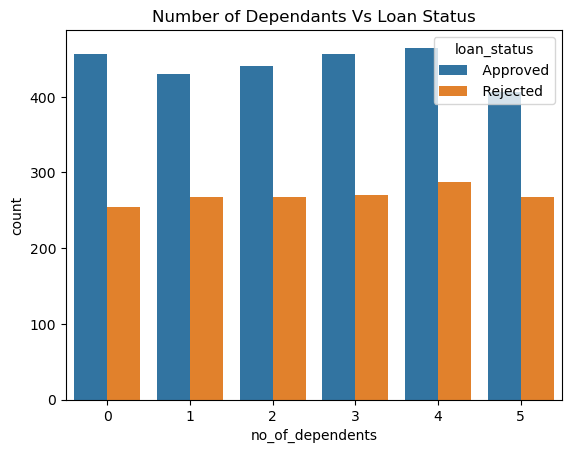

In [16]:
sns.countplot(x = 'no_of_dependents', data = df, hue = 'loan_status').set_title('Number of Dependants Vs Loan Status')

- The graph tells us that when someone has more family members to take care of their chances of getting a loan can go down. 
- But what's interesting is that the number of people who get loans approved doesn't change much, even if they have more family members. 
- This means my guess that loans might be approved less often for people with more family members isn't really right, based on this graph.

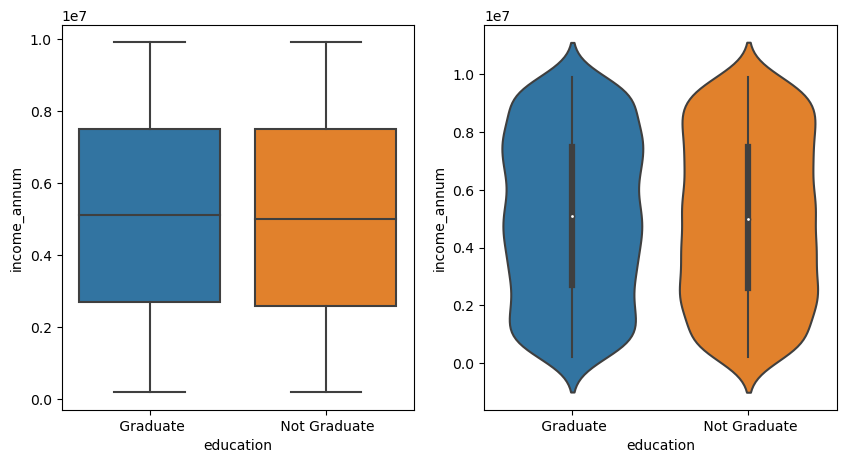

In [17]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.boxplot(x = 'education', y = 'income_annum', data = df, ax=ax[0])
sns.violinplot(x = 'education', y = 'income_annum', data = df, ax=ax[1])
plt.show()

- The combination of boxplot and violinplot visualizations provides insights into the relationship between education levels of loan applicants and their annual incomes. 
- The boxplot reveals that both graduates and non-graduates have similar median incomes, indicating that having a degree doesn't necessarily lead to a significant income advantage.
- Violinplot shows the distribution of income among the graduates and non graduate applicants, where we can see that non graduate applicants have a even distribution between income 2000000 and 8000000 , whereas there is a uneven distribution among the graduates with more applicants having income between 6000000 and 8000000.
- Since there is not much change in annual income of graduates and non graduates, I assume that education does not play a major role in the approval of loan.

Text(0.5, 1.0, 'Loan Status by Education')

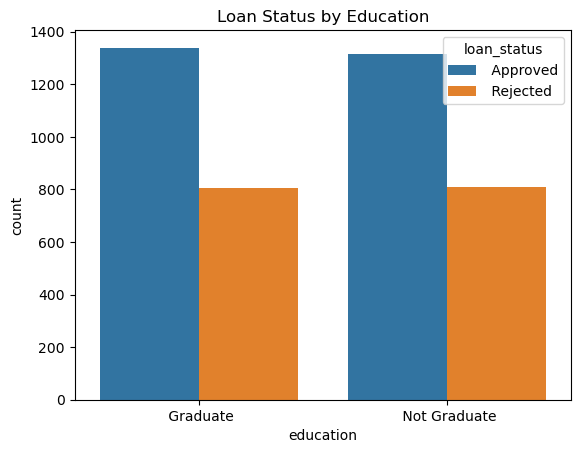

In [18]:
sns.countplot(x = 'education', hue = 'loan_status', data = df).set_title('Loan Status by Education')

- The graph indicates that there's only a small difference between the number of loans approved and rejected for both graduate and non-graduate applicants. This difference is so small that it doesn't seem to be significant.

### CIBIL Score Distribution

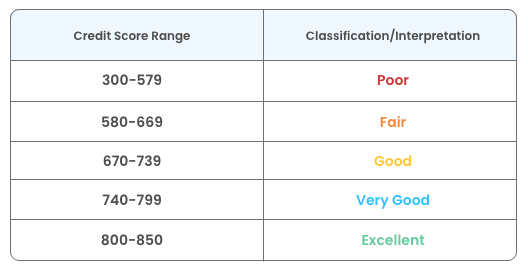

<AxesSubplot:xlabel='cibil_score', ylabel='Count'>

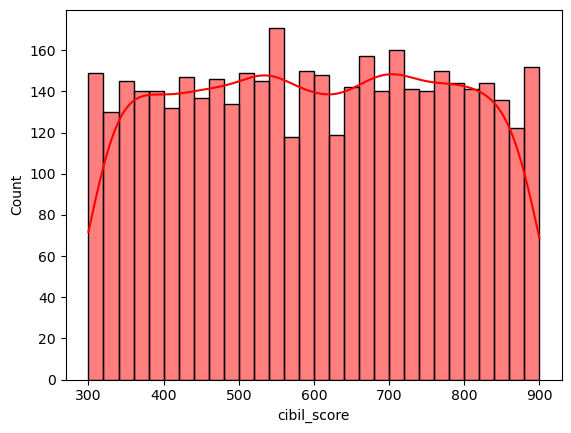

In [19]:
# viewing the distribution of the cibil_score column
sns.histplot(df["cibil_score"],bins=30, kde=True, color='red')

- Looking at the table, most customers have low CIBIL scores (below 669), which could make it hard for them to get loans approved. 
- But there's a good number of customers with high scores (above 669). 
- People with high CIBIL scores are more likely to get their loans approved.

#### Asset Distribution

In [20]:
# Movable Assets
df['Movable_assets'] = df['bank_asset_value'] + df['luxury_assets_value']

#Immovable Assets
df['Immovable_assets'] = df['residential_assets_value'] + df['commercial_assets_value']

Text(0.5, 1.0, 'Immovable_assets ')

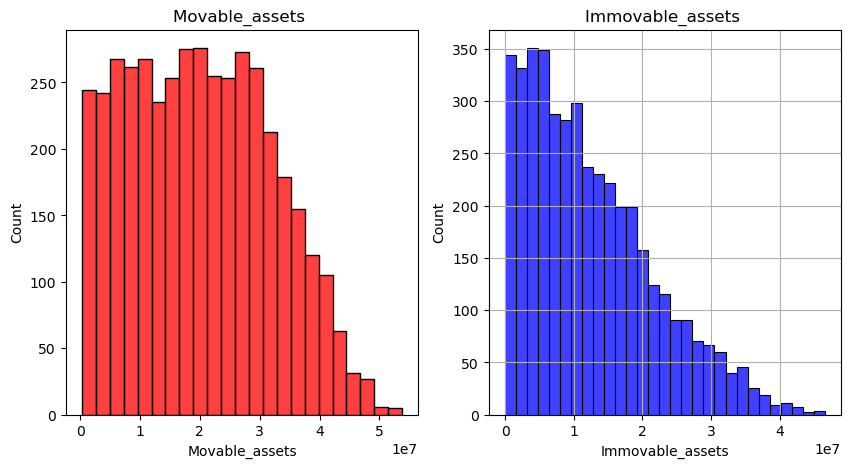

In [21]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
plt.subplot(1, 2, 1)
sns.histplot(df['Movable_assets'], ax=ax[0], color='red')
plt.title("Movable_assets ")

plt.subplot(1, 2, 2)
plt.grid()
sns.histplot(df['Immovable_assets'], ax=ax[1], color='blue')
plt.title("Immovable_assets ")

- Assets are one factor that lenders look at when approving a mortgage application. 
- The types are split into movable (like bank accounts and luxury things) and immovable (like homes and businesses). 
- The graphs show how many people have these kinds of assets. 
- For movable assets, most people have less than 30 million, and not many have a lot more. 
- For immovable assets, most have less than 15 million, and the number of people decreases as the value goes over 20 million. 
- It helps us understand how assets affect loan decisions.

Text(0.5, 1.0, 'Immovable_assets vs loan_amount')

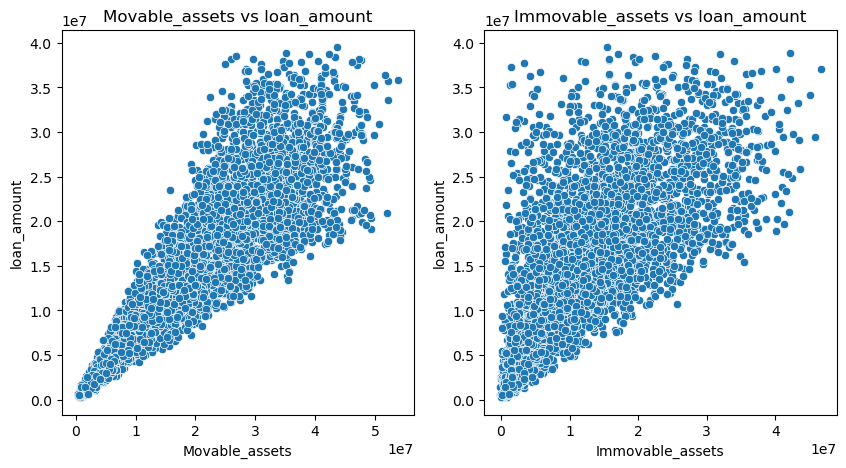

In [22]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.scatterplot(x='Movable_assets', y = 'loan_amount', data = df, ax=ax[0]).set_title('Movable_assets vs loan_amount')
sns.scatterplot(x='Immovable_assets', y = 'loan_amount', data = df, ax=ax[1]).set_title('Immovable_assets vs loan_amount')

<AxesSubplot:xlabel='income_annum', ylabel='loan_amount'>

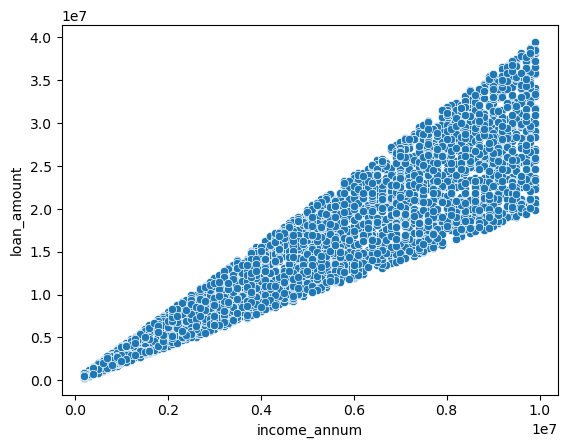

In [23]:
sns.scatterplot(x='income_annum', y = 'loan_amount', data = df)

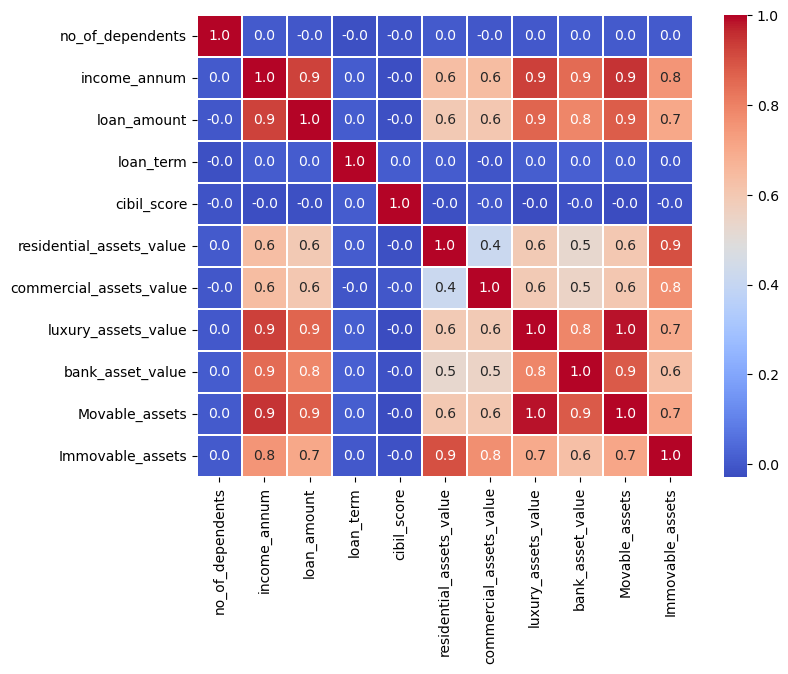

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

The heatmap of correlation values shows several strong connections:

1. Movable Assets and Immovable Assets
2. Income and Movable Assets
3. Income and Immovable Assets
4. Movable Assets and Loan Amount
5. Immovable Assets and Loan Amount
6. Loan Status and Cibil Score
7. Loan Amount and Income

It makes sense that movable and immovable assets are related since they're both types of assets. Similarly, income is linked to both movable and immovable assets, as those with higher income tend to have more assets.

Now, let's look at how assets relate to the loan amount, as well as how income connects to the loan amount. We've already discussed the connection between loan status and CIBIL score in the previous part.

## 4. Converting Categorical Data To Numerical Data

In [25]:
df['education'].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [26]:
df['self_employed'].unique()

array([' No', ' Yes'], dtype=object)

In [27]:
df['loan_status'].unique()

array([' Approved', ' Rejected'], dtype=object)

In [28]:
df['education'] = df['education'].map({' Not Graduate':0, ' Graduate':1})
df['self_employed'] = df['self_employed'].map({' No':0, ' Yes':1})
df['loan_status'] = df['loan_status'].map({' Rejected':0, ' Approved':1})

In [29]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Movable_assets,Immovable_assets
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,30700000,20000000
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,12100000,4900000
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,46100000,11600000
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,31200000,21500000
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,34400000,20600000


## 5. Train Test Split

In [30]:
from sklearn.model_selection import train_test_split # Library for Train Test Split

In [31]:
x = df.drop(['loan_status'], axis = 1)
y = df['loan_status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#### Importing Accuracy Score library

In [32]:
from sklearn.metrics import accuracy_score

## 6. Machine Learning Model

# a) Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression()

lgr.fit(x_train, y_train)

predictions = lgr.predict(x_test)

In [34]:
# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7295081967213115


# b) Decision Tree

In [35]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [36]:
# Create decision tree object
dt = DecisionTreeClassifier()

In [37]:
# Training model using the training data
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [38]:
dt_pred = dt.predict(x_test)

In [39]:
# Training Accuracy
dt.score(x_train, y_train)

1.0

In [40]:
# Calculate accuracy
accuracy = accuracy_score(y_test, dt_pred)
print("Accuracy:", accuracy)

Accuracy: 0.977751756440281


# c) Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rfc = RandomForestClassifier()

In [42]:
# Training the model using the training data
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [43]:
# Predicting the Loan Approval Status
rfc_pred = rfc.predict(x_test)

In [44]:
# Calculate accuracy
accuracy = accuracy_score(y_test, rfc_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9765807962529274


## Conclusion

When looking at different ways to predict if loans will be approved or not, we found that the Decision Tree model & Random Forest model worked really well. It was accurate and could predict outcomes quite accurately.

However, Logistic Regression model didn't work well for this dataset. It didn't predict as accurately as the Decision Tree and Random Forest models.

This tells us that picking the right model is really important. The Decision Tree and Random Forest models were great for this data, but Logistic Regression wasn't a good fit.